In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import datetime as dt

total_file = "total_travel_spending.csv"
total_df = pd.read_csv(total_file).set_index('State').T.reset_index().rename(columns={'index':'Date'})
total_df

State,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,Texas,Utah,Vermont,Virginia,Washington,Washington D.C.,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,14-Nov,174,39,293,107,"1,675",282,126,35,"1,179",...,960,133,30,330,222,92,60,141,48,55
1,21-Nov,175,36,298,108,"1,618",273,126,34,"1,258",...,969,140,32,325,209,83,55,146,49,57
2,28-Nov,176,43,342,107,"1,850",326,140,33,"1,427",...,"1,061",170,28,351,235,98,55,154,56,56
3,5-Dec,158,32,270,98,"1,605",260,129,29,"1,141",...,927,130,30,300,203,79,50,134,48,45
4,12-Dec,158,34,270,96,"1,416",261,123,31,"1,174",...,918,130,32,302,203,80,53,132,48,42
5,19-Dec,176,37,307,102,"1,613",297,149,33,"1,347",...,"1,051",149,35,335,236,88,53,151,55,45
6,26-Dec,174,40,281,108,"1,436",302,159,34,"1,221",...,"1,053",136,26,341,239,93,54,144,56,41
7,2-Jan,190,41,345,113,"1,530",333,183,41,"1,481",...,"1,134",168,32,410,273,109,62,183,54,51


In [2]:
percent_file = "percent_change_travel_spending.csv"
percent_df = pd.read_csv(percent_file).set_index('State').T.reset_index().rename(columns={'index':'Date'})
percent_df

State,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,Utah,Vermont,Virginia,Washington,Washington D.C.,West Virginia,Wisconsin,Wyoming,Puerto Rico,NaN
0,14-Nov,-23%,-30%,-31%,-26%,-42%,-33%,-47%,-21%,-41%,...,-30%,-43%,-37%,-44%,-65%,-30%,-43%,-33%,-43%,NaN
1,21-Nov,-22%,-36%,-29%,-26%,-44%,-35%,-47%,-24%,-37%,...,-27%,-40%,-38%,-47%,-69%,-35%,-40%,-33%,-41%,NaN
2,28-Nov,-22%,-23%,-19%,-26%,-36%,-23%,-41%,-26%,-29%,...,-11%,-47%,-33%,-41%,-63%,-35%,-37%,-23%,-43%,NaN
3,5-Dec,-28%,-40%,-35%,-31%,-44%,-37%,-45%,-34%,-42%,...,-31%,-42%,-41%,-48%,-70%,-40%,-44%,-32%,-53%,NaN
4,12-Dec,-29%,-37%,-35%,-32%,-50%,-37%,-47%,-30%,-40%,...,-31%,-39%,-41%,-48%,-69%,-36%,-45%,-32%,-57%,NaN
5,19-Dec,-20%,-32%,-26%,-28%,-43%,-28%,-36%,-25%,-32%,...,-21%,-34%,-35%,-39%,-66%,-36%,-37%,-23%,-53%,NaN
6,26-Dec,-21%,-26%,-32%,-24%,-49%,-27%,-32%,-23%,-38%,...,-27%,-50%,-33%,-38%,-64%,-35%,-40%,-21%,-57%,NaN
7,2-Jan,-9%,-19%,-11%,-15%,-43%,-15%,-17%,-1%,-20%,...,-5%,-35%,-15%,-25%,-56%,-21%,-19%,-20%,-43%,NaN


In [3]:
total_df['New Jersey'] = pd.to_numeric(total_df['New Jersey'],downcast="float")
total_df['New York'] = pd.to_numeric(total_df['New York'],downcast="float")

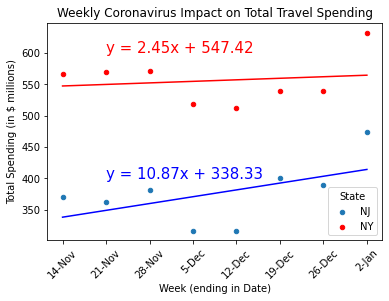

R-value (NJ): 0.5316243891349142
R-value (NY): 0.15724329557427166


In [27]:
ax = total_df.plot.scatter(x='Date',y='New Jersey',label='NJ')
total_df.plot.scatter(x='Date',y='New York',label='NY',color='red',rot=45, ax=ax)

plt.ylabel("Total Spending (in $ millions)")
plt.xlabel("Week (ending in Date)")
plt.title("Weekly Coronavirus Impact on Total Travel Spending")

# find regression line and r-value
# x_values = weeks since 14Nov2020
x_values = total_df.index.values
NJ_y_values = total_df['New Jersey']
NY_y_values = total_df['New York']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, NJ_y_values)
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values, NY_y_values)
regress_values = x_values * slope + intercept
regress_values1 = x_values * slope1 + intercept1
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values,regress_values,"b-")
plt.plot(x_values,regress_values1,"r-")
plt.annotate(line_eq,(1,400),fontsize=15,color="blue")
plt.annotate(line_eq1,(1,600),fontsize=15,color="red")

plt.show()
print(f"R-value (NJ): {rvalue}")
print(f"R-value (NY): {rvalue1}")

In [5]:
percent_df['New Jersey'] = percent_df['New Jersey'].str.replace('%','').astype('float')
percent_df['New York'] = percent_df['New York'].str.replace('%','').astype('float')

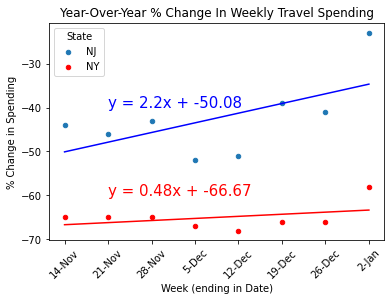

R-value (NJ): 0.5968518328115203
R-value (NY): 0.38575837490522974


In [25]:
ax2 = percent_df.plot.scatter(x='Date',y='New Jersey',label='NJ')
percent_df.plot.scatter(x='Date',y='New York',label='NY',color='red',rot=45,ax=ax2)

plt.ylabel("% Change in Spending")
plt.xlabel("Week (ending in Date)")
plt.title("Year-Over-Year % Change In Weekly Travel Spending")

#find regression line and r-value
# x_values = weeks since 14Nov2020
x_values2 = percent_df.index.values
NJ_y_values2 = percent_df['New Jersey']
NY_y_values2 = percent_df['New York']

(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values2, NJ_y_values2)
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values2, NY_y_values2)
regress_values2 = x_values2 * slope2 + intercept2
regress_values3 = x_values2 * slope3 + intercept3
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
plt.plot(x_values2,regress_values2,"b-")
plt.plot(x_values2,regress_values3,"r-")
plt.annotate(line_eq2,(1,-40),fontsize=15,color="blue")
plt.annotate(line_eq3,(1,-60),fontsize=15,color="red")

plt.show()
print(f"R-value (NJ): {rvalue2}")
print(f"R-value (NY): {rvalue3}")

In [21]:
# According to line_eq2:
# when NJ travel is "normal", % change in spending will return to 0%:
y = 0
x = ((y + 50.08)/2.2)*7
start = dt.datetime(2020, 11, 14)
(start + dt.timedelta(days=x)).strftime('%y-%m-%d')

'21-04-22'

In [26]:
# According to line_eq3:
# when NY travel is "normal", % change in spending will return to 0%:
y = 0
x = ((y + 66.67)/0.48)*7
start = dt.datetime(2020, 11, 14)
(start + dt.timedelta(days=x)).strftime('%y-%m-%d')

'23-07-14'